# **Frequency Domain Features**

## **Importing Libraries and Loading Data**

In [1]:
#Import Libraries
import matplotlib.pyplot as plt
import numpy as np
import librosa
import librosa.display
import IPython.display as ipd
from scipy import stats
import  math

In [2]:
#File Path
debussy_file = "audio/debussy.wav"
redhot_file = "audio/redhot.wav"
duke_file = "audio/duke.wav"

## **Extracting Basic Features and Visualizing Audio File**

In [3]:
# load audio files with librosa
debussy, sr = librosa.load(debussy_file)
redhot, _ = librosa.load(redhot_file) #_ means same as above sr
duke, _ = librosa.load(duke_file)

In [4]:
print("Debussy audio file shape : ",debussy.shape)
print("Redhot audio file shape : ",redhot.shape)
print("Duke audio file shape : ",duke.shape)

Debussy audio file shape :  (661500,)
Redhot audio file shape :  (661500,)
Duke audio file shape :  (661500,)


In [5]:
# duration in seconds of 1 sample
sample_duration = 1 / sr
print("Sample Duration : ", sample_duration)

Sample Duration :  4.5351473922902495e-05


In [6]:
# total number of samples in audio file
tot_samples = len(debussy)
print("Total Number of Samples :",tot_samples)

Total Number of Samples : 661500


### Visualizing Signal in time domain

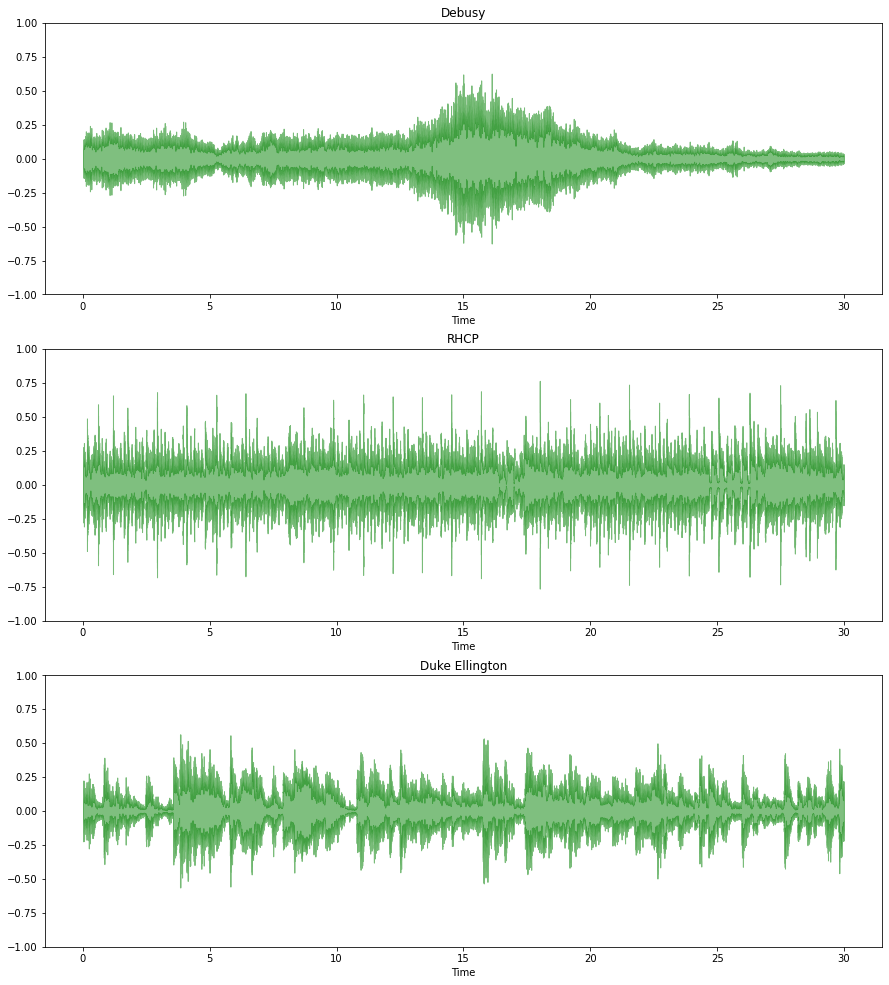

In [7]:
plt.figure(figsize=(15, 17))

plt.subplot(3, 1, 1)
librosa.display.waveshow(debussy, alpha=0.5, color = 'green')
plt.ylim((-1, 1))
plt.title("Debusy")

plt.subplot(3, 1, 2)
librosa.display.waveshow(redhot, alpha=0.5, color = 'green')
plt.ylim((-1, 1))
plt.title("RHCP")

plt.subplot(3, 1, 3)
librosa.display.waveshow(duke, alpha=0.5, color = 'green')
plt.ylim((-1, 1))
plt.title("Duke Ellington")

plt.show()

## **Spectogram**
A spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform.  Not only can one see whether there is more or less energy at, for example, 2 Hz vs 10 Hz, but one can also see how energy levels vary over time.

Spectrograms are used extensively in the fields of music, linguistics, sonar, radar, speech processing, seismology, and others. Spectrograms of audio can be used to identify spoken words phonetically, and to analyse the various calls of animals.

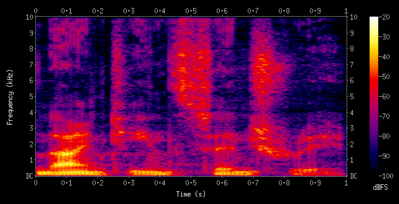

In [8]:
#Extract Spectogram
FRAME_SIZE = 2048
HOP_SIZE = 512

debussy_spec = librosa.stft(debussy, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
redhot_spec = librosa.stft(redhot, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)
duke_spec = librosa.stft(duke, n_fft=FRAME_SIZE, hop_length=HOP_SIZE)

In [9]:
#Spectogram plot function
def plot_spectrogram(Y, sr, hop_length, y_axis="linear"):
    plt.figure(figsize=(25, 10))
    librosa.display.specshow(Y, 
                             sr=sr, 
                             hop_length=hop_length, 
                             x_axis="time", 
                             y_axis=y_axis)
    plt.colorbar(format="%+2.f")

In [10]:
#Log Amplitude Spectogram
debus_log = librosa.power_to_db(np.abs(debussy_spec)**2)
duke_log = librosa.power_to_db(np.abs(duke_spec)**2)
red_log = librosa.power_to_db(np.abs(redhot_spec)**2)

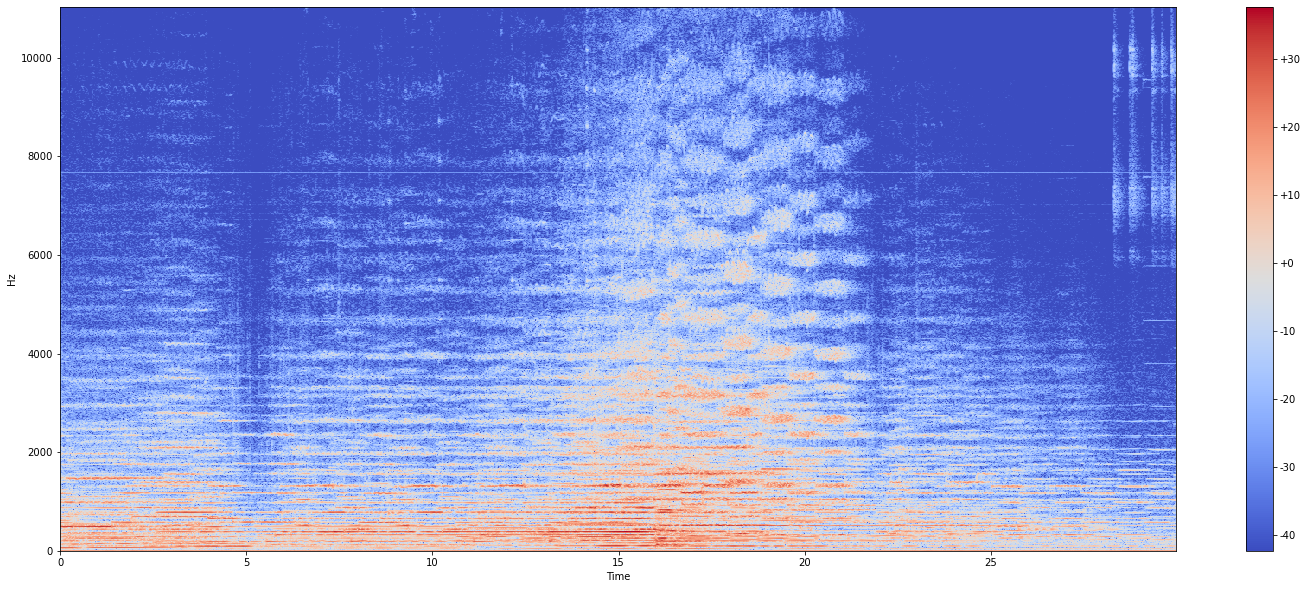

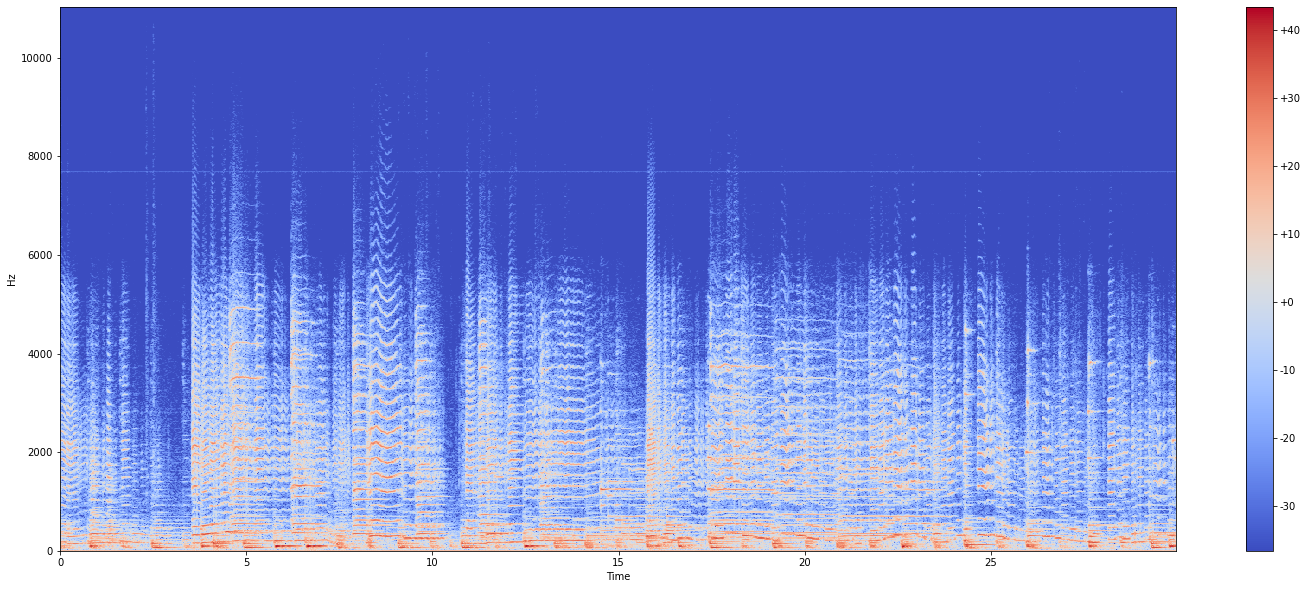

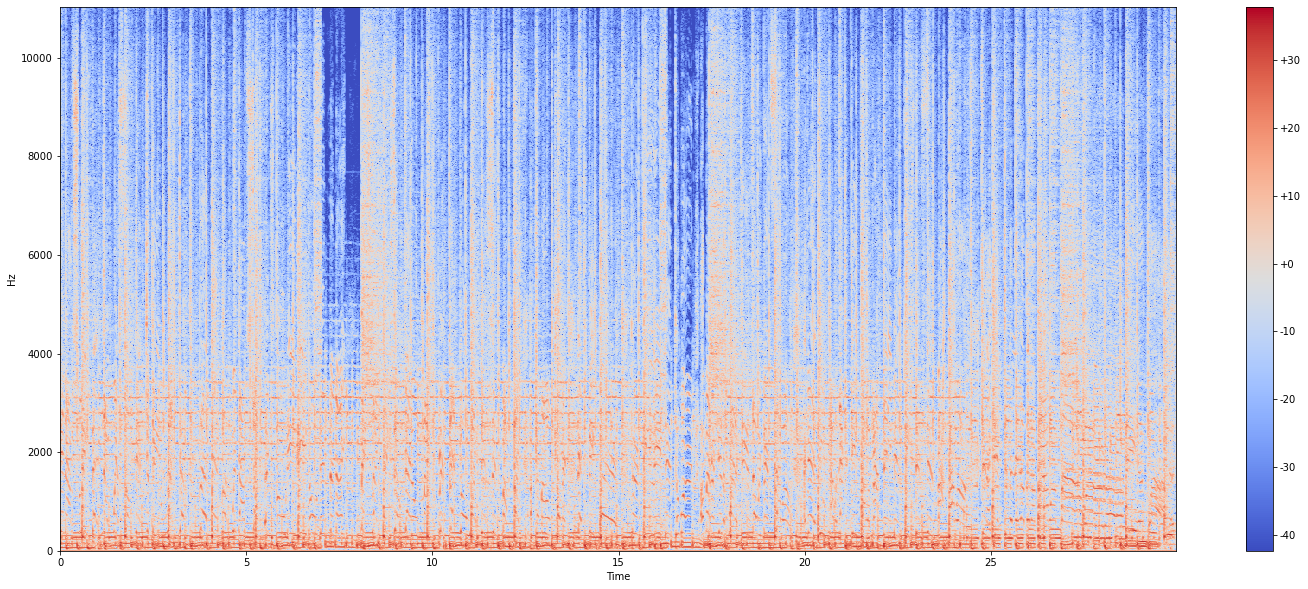

In [11]:
#plot Spectogram
plot_spectrogram(debus_log, sr, HOP_SIZE)
plot_spectrogram(duke_log, sr, HOP_SIZE)
plot_spectrogram(red_log, sr, HOP_SIZE)

## **Feature  1 : Spectral Centroid**
**Spectral Centroid :** As the name suggests, a spectral centroid is the location of the centre of mass of the spectrum. Since the audio files are digital signals and the spectral centroid is a measure that can be useful in the characterization of the spectrum of the audio file signal.
In some places, it can be considered as the median of the spectrum but there is a difference between the measurement of the spectral centroid and median of the spectrum. The spectral centroid is like a weighted median and the median of the spectrum is similar to the mean. Both of them measure the central tendency of the signal. In some cases, both of them show similar results.

![Centroid](https://149695847.v2.pressablecdn.com/wp-content/uploads/2021/09/image-104.png)

- x(n) is the weight frequency value
- n is the bin number.
- f(n) is the centre frequency of the bin
  
**Reference :**
- https://analyticsindiamag.com/a-tutorial-on-spectral-feature-extraction-for-audio-analytics/
- https://www.kaggle.com/code/ashkhagan/audio-signal-processing-librosa/notebook

In [12]:
#Calculate spectral centroid for audio files
debussy_sc = librosa.feature.spectral_centroid(y=debussy,sr=sr)[0]
duke_sc = librosa.feature.spectral_centroid(y=duke,sr=sr)[0]
redhot_sc = librosa.feature.spectral_centroid(y=redhot,sr=sr)[0]

In [13]:
#Compute the time variable for visualization:

frames = range(len(debussy_sc))
t = librosa.frames_to_time(frames)

In [14]:
from sklearn.preprocessing import minmax_scale
def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)

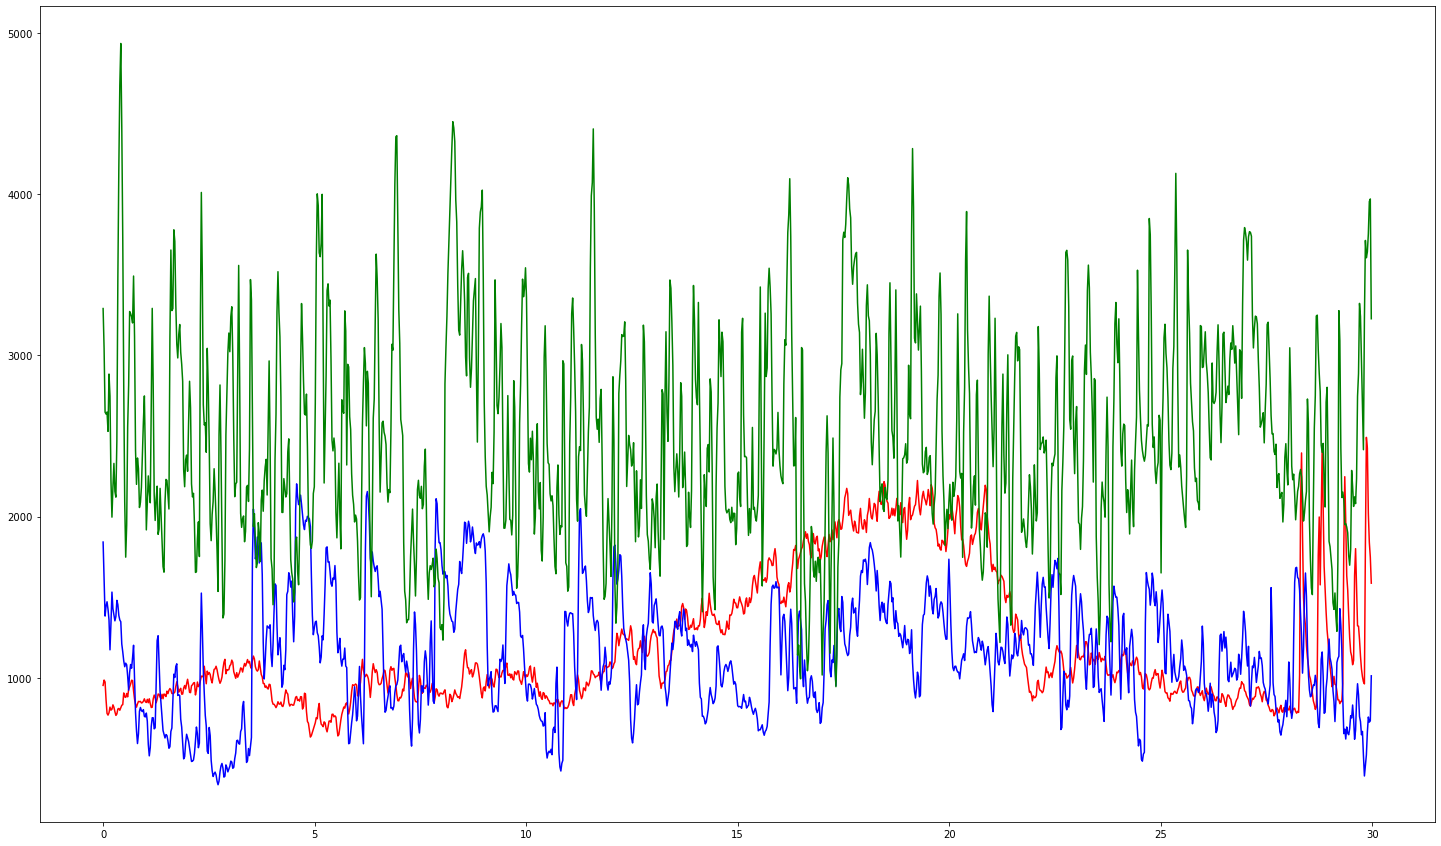

In [15]:
plt.figure(figsize = (25,15))
plt.plot(t,debussy_sc, color='r')
plt.plot(t,duke_sc, color='b')
plt.plot(t,redhot_sc, color='g')
plt.show()

In [19]:
S = librosa.amplitude_to_db(abs(debussy_spec))
T = librosa.amplitude_to_db(abs(duke_spec))
U = librosa.amplitude_to_db(abs(redhot_spec))

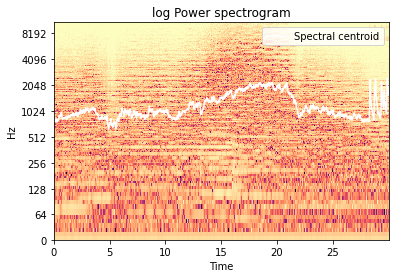

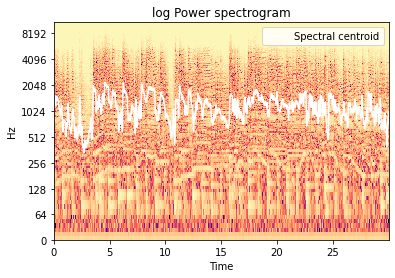

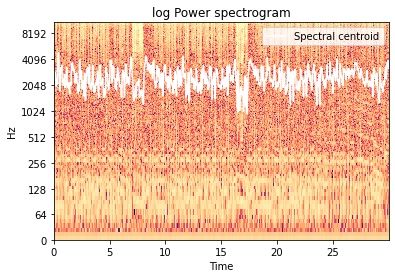

In [21]:
import matplotlib.pyplot as plt
times = librosa.times_like(debussy_sc)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, debussy_sc.T, label='Spectral centroid', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')

times1 = librosa.times_like(duke_sc)
fig1, ax1 = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(T, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax1)
ax1.plot(times1, duke_sc.T, label='Spectral centroid', color='w')
ax1.legend(loc='upper right')
ax1.set(title='log Power spectrogram')

times2 = librosa.times_like(redhot_sc)
fig2, ax2 = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(U, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax2)
ax2.plot(times2, redhot_sc.T, label='Spectral centroid', color='w')
ax2.legend(loc='upper right')
ax2.set(title='log Power spectrogram')
plt.show()

## **Feature 2 : Spectral Bandwidth**
**Bandwidth :** Bandwidth is the difference between the upper and lower frequencies in a continuous band of frequencies. As we know the signals oscillate about a point so if the point is the centroid of the signal then the sum of maximum deviation of the signal on both sides of the point can be considered as the bandwidth of the signal at that time frame.

The spectral bandwidth can be computed by

(sum_k S[k, t] * (freq[k, t] - centroid[t])**p)**(1/p)

Where p is order and t is time.

For example, if a signal has frequencies of 1000 Hz, 700 HZ, 300hz, and 100hz then the bandwidth of the signal will be 

1000-100 = 900hz.

**References :**
- https://analyticsindiamag.com/a-tutorial-on-spectral-feature-extraction-for-audio-analytics/

In [26]:
HOP_LENGTH = 512

ban_debussy = librosa.feature.spectral_bandwidth(y=debussy, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
ban_redhot = librosa.feature.spectral_bandwidth(y=redhot, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]
ban_duke = librosa.feature.spectral_bandwidth(y=duke, sr=sr, n_fft=FRAME_SIZE, hop_length=HOP_LENGTH)[0]

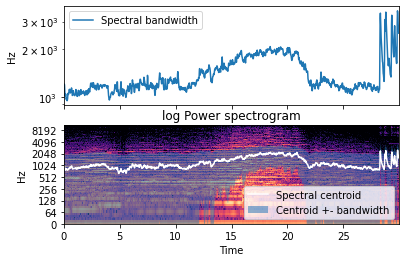

In [28]:
import matplotlib.pyplot as plt

S, phase = librosa.magphase(librosa.stft(y=debussy))
librosa.feature.spectral_bandwidth(S=S)

fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(ban_debussy)
centroid = librosa.feature.spectral_centroid(S=S)
ax[0].semilogy(times, ban_debussy, label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')
ax[1].fill_between(times, np.maximum(0, centroid[0] - ban_debussy[0]),
                np.minimum(centroid[0] + ban_debussy[0], sr/2),
                alpha=0.5, label='Centroid +- bandwidth')
ax[1].plot(times, centroid[0], label='Spectral centroid', color='w')
ax[1].legend(loc='lower right')
plt.show()

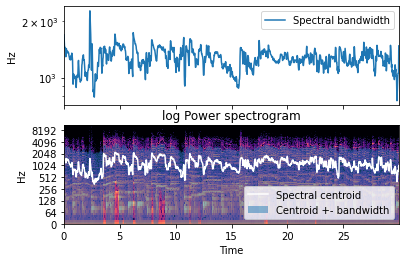

In [29]:
S, phase = librosa.magphase(librosa.stft(y=duke))
librosa.feature.spectral_bandwidth(S=S)

fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(ban_duke)
centroid = librosa.feature.spectral_centroid(S=S)
ax[0].semilogy(times, ban_duke, label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')
ax[1].fill_between(times, np.maximum(0, centroid[0] - ban_duke[0]),
                np.minimum(centroid[0] + ban_duke[0], sr/2),
                alpha=0.5, label='Centroid +- bandwidth')
ax[1].plot(times, centroid[0], label='Spectral centroid', color='w')
ax[1].legend(loc='lower right')
plt.show()

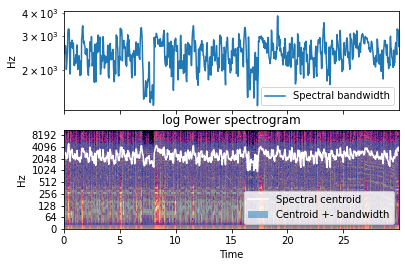

In [32]:
S, phase = librosa.magphase(librosa.stft(y=redhot))
librosa.feature.spectral_bandwidth(S=S)

fig, ax = plt.subplots(nrows=2, sharex=True)
times = librosa.times_like(ban_redhot)
centroid = librosa.feature.spectral_centroid(S=S)
ax[0].semilogy(times, ban_redhot, label='Spectral bandwidth')
ax[0].set(ylabel='Hz', xticks=[], xlim=[times.min(), times.max()])
ax[0].legend()
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='log Power spectrogram')
ax[1].fill_between(times, np.maximum(0, centroid[0] - ban_redhot[0]),
                np.minimum(centroid[0] + ban_redhot[0], sr/2),
                alpha=0.5, label='Centroid +- bandwidth')
ax[1].plot(times, centroid[0], label='Spectral centroid', color='w')
ax[1].legend(loc='lower right')
plt.show()

## **Feature 3 : Band Energy Ratio**
**Band Energy Ratio :** The Band Energy Ratio (BER) provides the relation between the lower and higher frequency bands. It can be thought of as the measure of how dominant low frequencies are. This feature has been extensively used in music/speech discrimination, music classification etc.

**References :**
- https://devopedia.org/audio-feature-extraction

In [34]:
def calculate_split_frequency_bin(split_frequency, sample_rate, num_frequency_bins):
    """Infer the frequency bin associated to a given split frequency."""
    
    frequency_range = sample_rate / 2
    frequency_delta_per_bin = frequency_range / num_frequency_bins
    split_frequency_bin = math.floor(split_frequency / frequency_delta_per_bin)
    return int(split_frequency_bin)

In [35]:
split_frequency_bin = calculate_split_frequency_bin(2000, 22050, 1025)
split_frequency_bin

185

In [36]:
def band_energy_ratio(spectrogram, split_frequency, sample_rate):
    """Calculate band energy ratio with a given split frequency."""
    
    split_frequency_bin = calculate_split_frequency_bin(split_frequency, sample_rate, len(spectrogram[0]))
    band_energy_ratio = []
    
    # calculate power spectrogram
    power_spectrogram = np.abs(spectrogram) ** 2
    power_spectrogram = power_spectrogram.T
    
    # calculate BER value for each frame
    for frame in power_spectrogram:
        sum_power_low_frequencies = frame[:split_frequency_bin].sum()
        sum_power_high_frequencies = frame[split_frequency_bin:].sum()
        band_energy_ratio_current_frame = sum_power_low_frequencies / sum_power_high_frequencies
        band_energy_ratio.append(band_energy_ratio_current_frame)
    
    return np.array(band_energy_ratio)

In [37]:
ber_debussy = band_energy_ratio(debussy_spec, 2000, sr)
ber_redhot = band_energy_ratio(redhot_spec, 2000, sr)
ber_duke = band_energy_ratio(duke_spec, 2000, sr)

In [38]:
frames = range(len(ber_debussy))
t = librosa.frames_to_time(frames, hop_length=HOP_SIZE)

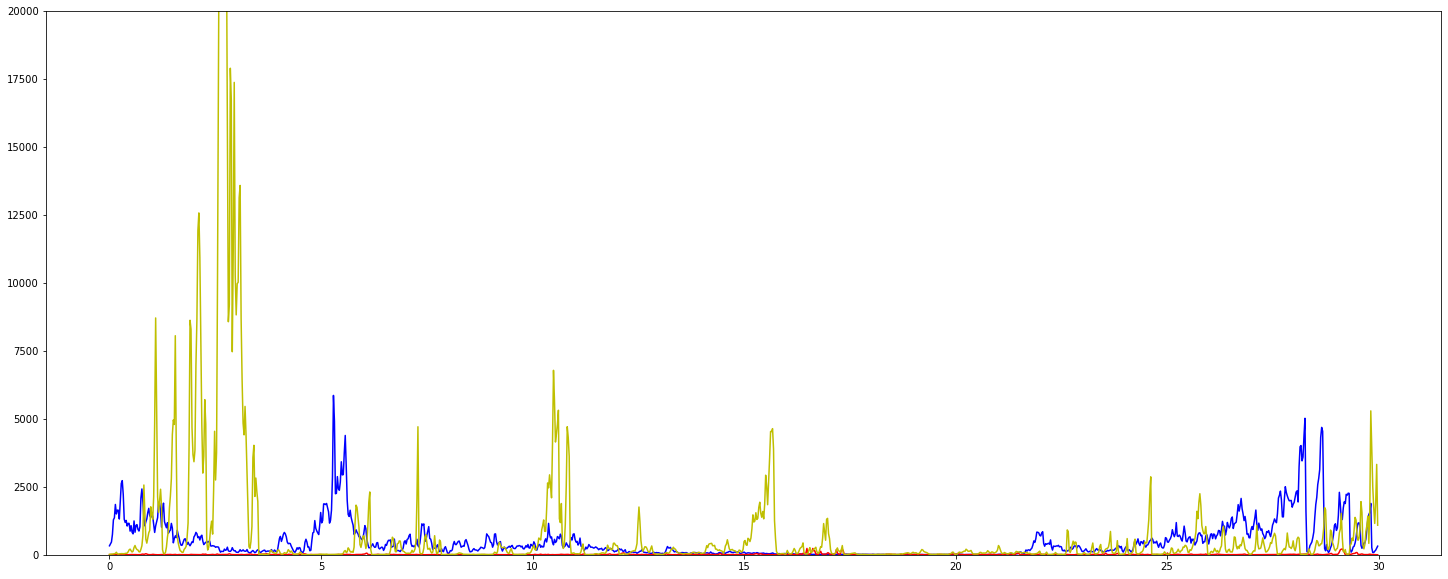

In [39]:
plt.figure(figsize=(25, 10))

plt.plot(t, ber_debussy, color="b")
plt.plot(t, ber_redhot, color="r")
plt.plot(t, ber_duke, color="y")
plt.ylim((0, 20000))
plt.show()

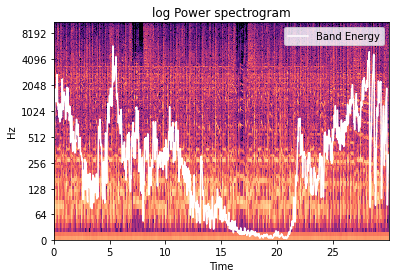

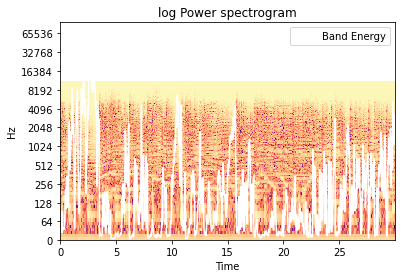

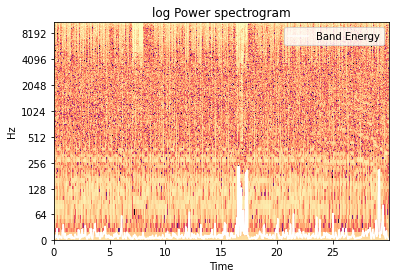

In [41]:
import matplotlib.pyplot as plt
times = librosa.times_like(ber_debussy)
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(times, ber_debussy.T, label='Band Energy', color='w')
ax.legend(loc='upper right')
ax.set(title='log Power spectrogram')


times1 = librosa.times_like(ber_duke)
fig1, ax1 = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(T, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax1)
ax1.plot(times1, ber_duke.T, label='Band Energy', color='w')
ax1.legend(loc='upper right')
ax1.set(title='log Power spectrogram')

times2 = librosa.times_like(ber_redhot)
fig2, ax2 = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(U, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax2)
ax2.plot(times2, ber_redhot.T, label='Band Energy', color='w')
ax2.legend(loc='upper right')
ax2.set(title='log Power spectrogram')
plt.show()

## **Feature 4 : Spectral Contrast**

**Spectral contrast :** It is defined as the level difference between peaks and valleys in the spectrum.

Each frame of a spectrogram S is divided into sub-bands. For each sub-band, the energy contrast is estimated by comparing the mean energy in the top quantile (peak energy) to that of the bottom quantile (valley energy). High contrast values generally correspond to clear, narrow-band signals, while low contrast values correspond to broad-band noise.

**Reference :**
 - http://librosa.org/doc/main/generated/librosa.feature.spectral_contrast.html

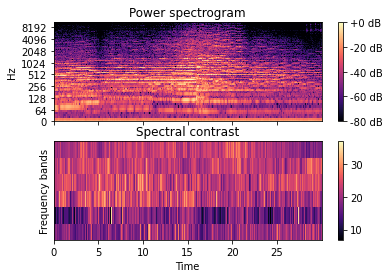

In [44]:
#for debussy.wav audio file
y, sr = librosa.load('audio/debussy.wav')
S = np.abs(librosa.stft(y))
contrast = librosa.feature.spectral_contrast(S=S, sr=sr)

fig, ax = plt.subplots(nrows=2, sharex=True)
img1 = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                 ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img1, ax=[ax[0]], format='%+2.0f dB')
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
img2 = librosa.display.specshow(contrast, x_axis='time', ax=ax[1])
fig.colorbar(img2, ax=[ax[1]])
ax[1].set(ylabel='Frequency bands', title='Spectral contrast')
plt.show()

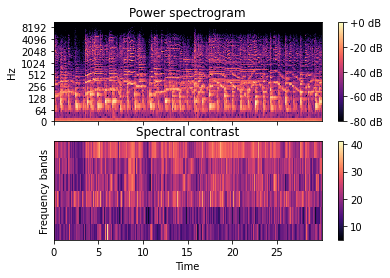

In [45]:
#for duke.wav audio file
y, sr = librosa.load('audio/duke.wav')
S = np.abs(librosa.stft(y))
contrast = librosa.feature.spectral_contrast(S=S, sr=sr)

fig, ax = plt.subplots(nrows=2, sharex=True)
img1 = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                 ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img1, ax=[ax[0]], format='%+2.0f dB')
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
img2 = librosa.display.specshow(contrast, x_axis='time', ax=ax[1])
fig.colorbar(img2, ax=[ax[1]])
ax[1].set(ylabel='Frequency bands', title='Spectral contrast')
plt.show()

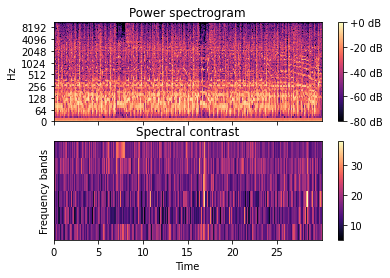

In [46]:
#for redhot.wav audio file
y, sr = librosa.load('audio/redhot.wav')
S = np.abs(librosa.stft(y))
contrast = librosa.feature.spectral_contrast(S=S, sr=sr)

fig, ax = plt.subplots(nrows=2, sharex=True)
img1 = librosa.display.specshow(librosa.amplitude_to_db(S,
                                                 ref=np.max),
                         y_axis='log', x_axis='time', ax=ax[0])
fig.colorbar(img1, ax=[ax[0]], format='%+2.0f dB')
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
img2 = librosa.display.specshow(contrast, x_axis='time', ax=ax[1])
fig.colorbar(img2, ax=[ax[1]])
ax[1].set(ylabel='Frequency bands', title='Spectral contrast')
plt.show()

## **Feature 5 : Spectral Flatness**

**Spectral flatness :** is defined as the ratio of the geometric mean to the arithmetic mean of a power spectrum. The arithmetic mean of a sequence of n items is what you usually think of as a mean or average: add up all the items and divide by n. The geometric mean of a sequence of n items is the nth root of their product.

Spectral flatness (or tonality coefficient) is a measure to quantify how much noise-like a sound is, as opposed to being tone-like 1. A high spectral flatness (closer to 1.0) indicates the spectrum is similar to white noise. It is often converted to decibel.

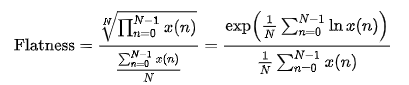

**References :**
 - http://librosa.org/doc/main/generated/librosa.feature.spectral_flatness.html

In [55]:
y, sr = librosa.load('audio/debussy.wav')
flatness = librosa.feature.spectral_flatness(y=y)
flatness

array([[0.00091765, 0.00065248, 0.00048552, ..., 0.00227428, 0.00175409,
        0.00183668]], dtype=float32)

In [56]:
S, phase = librosa.magphase(librosa.stft(y))
librosa.feature.spectral_flatness(S=S)

array([[0.00091765, 0.00065248, 0.00048552, ..., 0.00227428, 0.00175409,
        0.00183668]], dtype=float32)

In [49]:
S, phase = librosa.magphase(librosa.stft(y))
S_power = S ** 2
flat = librosa.feature.spectral_flatness(S=S_power, power=1.0)

[Text(0.5, 1.0, 'log Power spectrogram')]

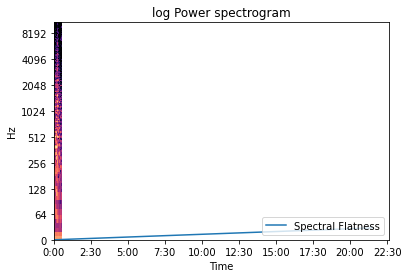

In [57]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
librosa.display.specshow(librosa.amplitude_to_db(S, ref=np.max),
                         y_axis='log', x_axis='time', ax=ax)
ax.plot(librosa.times_like(flat), label='Spectral Flatness')

ax.legend(loc='lower right')
ax.set(title='log Power spectrogram')